In [1287]:
import pandas as pd

In [1288]:
vente = pd.read_csv('data/SALE_ALL.csv')
achat = pd.read_csv('data/PURCHASE_ALL.csv')
prodid_map = pd.read_csv('data/ProductIdMapp.csv')
produit_perime = pd.read_csv('data/ProduitsPerimes.csv')

In [1289]:
vente.head()

,orderdate,prodid,quantity
0,2019-08-08,2701,1.0
1,2019-08-08,4284,1.0
2,2019-08-08,2154,1.0
3,2019-08-08,275,1.0
4,2019-08-08,3616,1.0


In [1290]:
achat.head()

,orderdate,prodid,quantity
0,2019-08-08,113,1.0
1,2019-08-08,130,2.0
2,2019-08-08,131,30.0
3,2019-08-08,145,1.0
4,2019-08-08,146,5.0


In [1291]:
prodid_map.head()

,prodid,name
0,100,MULTIVITAMINES GLOBAL 12 VIT+ 7 OLIGO ELEMENTS...
1,102,804 AIDE MINCEUR TRIPLE ACTION CP B/30 3CHENE
2,103,804 BRULE GRAISSE SOL BUV STABILISATEUR FL/500ML
3,104,804 PACK MINCEUR
4,105,804 SOUPE B/300G LEGUMES


In [1292]:
produit_perime.head()

,prodid,qmp
0,102,1.0
1,210,1.0
2,216,15.0
3,219,1.0
4,225,1.0


**Traitement des valeures dupliquée des VENTES**

In [1293]:
vente.duplicated(subset=['orderdate','prodid']).sum()

np.int64(179948)

In [1294]:
# Regrouper les valeures dupliquées en date et produit et 
# remplacer les  valeures de leur quantités en somme des quantités du groupe

vente_nodup = vente.groupby(['orderdate','prodid'], as_index=False)['quantity'].sum()
vente_nodup.head()

,orderdate,prodid,quantity
0,2012-11-23,843,3.0
1,2012-11-23,1179,1.0
2,2012-11-23,2924,1.0
3,2012-11-23,3858,2.0
4,2012-11-23,4090,1.0


In [1295]:
vente.shape, vente_nodup.shape, vente.duplicated(subset=['orderdate','prodid']).sum()

((622506, 3), (442558, 3), np.int64(179948))

In [1296]:
vente_nodup.shape[0] - vente.shape[0]

-179948

In [1297]:
vente_nodup.duplicated().sum()

np.int64(0)

**Traitement des valeurs dupliquées des ACHATS**

In [1298]:
achat.duplicated(subset=['orderdate','prodid']).sum()

np.int64(2317)

In [1299]:
# Regrouper les valeures dupliquées en date et produit et 
# remplacer les  valeures de leur quantités en somme des quantités du groupe

achat_nodup = achat.groupby(['orderdate','prodid'], as_index=False)['quantity'].sum()
achat_nodup.head()

,orderdate,prodid,quantity
0,2012-11-23,4774,3.0
1,2019-08-06,218,1.0
2,2019-08-06,599,1.0
3,2019-08-06,602,5.0
4,2019-08-06,734,1.0


In [1300]:
achat_nodup.duplicated().sum()

np.int64(0)

In [1301]:
achat_nodup.shape[0], achat.shape[0]

(133812, 136129)

In [1302]:
achat.duplicated(subset=['orderdate','prodid']).sum(), achat_nodup.shape[0] - achat.shape[0]

(np.int64(2317), -2317)

**Traitement du liste de référencement des id produits et nom de produits**

In [1303]:
# faire 'id' comme index

prodid_map = prodid_map.set_index('prodid')
prodid_map.head()

,name
prodid,
100,MULTIVITAMINES GLOBAL 12 VIT+ 7 OLIGO ELEMENTS...
102,804 AIDE MINCEUR TRIPLE ACTION CP B/30 3CHENE
103,804 BRULE GRAISSE SOL BUV STABILISATEUR FL/500ML
104,804 PACK MINCEUR
105,804 SOUPE B/300G LEGUMES


In [1304]:
produit_perime.sort_values(by = 'qmp',ascending=False).head()

,prodid,qmp
326,5469,300.0
304,5219,52.0
285,4968,27.0
259,4592,19.0
221,3700,19.0


In [1305]:
# Affichager des n top produits les plus perimés (QMP > critere)
# QMP = Quantité Moyenne par Produit Périmé

critere = 10

plus_perime = produit_perime[produit_perime['qmp'] >= critere].sort_values('qmp', ascending=False)

plus_perime.join(prodid_map, on='prodid')

,prodid,qmp,name
326,5469,300.0,COVID ORGANICS TISANE SOL BUV FL/33ML IMRA
304,5219,52.0,COTON HYDR SUP 25G ORELIA
285,4968,27.0,ZINNIA-F CP ENR B/3*28 FAMY CARE LTD
259,4592,19.0,THYMENT - CIMETIDINE 400MG CP DET PL/10
221,3700,19.0,PHENOBARBITAL 40MG/1ML SOL INJ DET CIRON
338,5623,18.0,RIZIDE 80MG CP DET SUNRISE
91,1576,16.0,DOLIPRANE 300MG SACH DET (16-48 KG) SANOFI AVE...
2,216,15.0,ALERID 10MG CP DET PL/10 CIPLA
441,6936,13.0,BANDELETTE EXACTIVE EQ MICROTECH MEDICAL (HAN...
363,5870,10.0,HCQS HYDROXYCHLOROQUINE SULFATE 200MG CP PELLI...


In [1306]:
plus_perime.shape[0]

10

In [1307]:
# Filtrer les données de vente pour ne garder que les produits dans 'plus_perime'

vente_perime = vente_nodup[vente_nodup['prodid'].isin(plus_perime['prodid'])]
vente_perime.head()

,orderdate,prodid,quantity
835,2019-08-24,1576,2.0
981,2019-08-27,1576,8.0
1128,2019-08-29,1576,4.0
1173,2019-08-30,216,1.0
1427,2019-09-03,216,1.0


In [1308]:
vente_perime.shape

(1117, 3)

In [1309]:
achat_perime = achat_nodup[achat_nodup['prodid'].isin(plus_perime['prodid'])]
achat_perime.head(10)

,orderdate,prodid,quantity
718,2019-08-09,216,10.0
1714,2019-08-24,1576,12.0
1919,2019-08-24,4968,80.0
3383,2019-09-27,1576,12.0
3650,2019-10-04,216,10.0
4289,2019-10-19,216,40.0
6697,2019-12-17,5219,2.0
6983,2019-12-26,1576,12.0
8202,2020-01-21,1576,12.0
8377,2020-01-24,1576,12.0


In [1310]:
vente_perime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1117 entries, 835 to 441967
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   orderdate  1117 non-null   object 
 1   prodid     1117 non-null   int64  
 2   quantity   1117 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 34.9+ KB


In [1311]:
achat_perime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 718 to 132775
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   orderdate  162 non-null    object 
 1   prodid     162 non-null    int64  
 2   quantity   162 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


In [1312]:
# Transformer la colonne 'orderdate' en datetime

vente_perime['orderdate'] = pd.to_datetime(vente_perime['orderdate'])
achat_perime['orderdate'] = pd.to_datetime(achat_perime['orderdate'])

C:\Users\herif\AppData\Local\Temp\ipykernel_14228\1740534343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vente_perime['orderdate'] = pd.to_datetime(vente_perime['orderdate'])
C:\Users\herif\AppData\Local\Temp\ipykernel_14228\1740534343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  achat_perime['orderdate'] = pd.to_datetime(achat_perime['orderdate'])


In [1313]:
vente_perime = vente_perime.pivot_table(index= 'orderdate',columns='prodid', values='quantity', aggfunc='mean')
vente_perime.head()

prodid,216,1576,3700,4592,4968,5219,5469,5623,5870,6936
orderdate,,,,,,,,,,
2019-08-24,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-27,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-29,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-30,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1314]:
achat_perime = achat_perime.pivot_table(index= 'orderdate',columns='prodid', values='quantity', aggfunc='mean')
achat_perime.head()

prodid,216,1576,3700,4592,4968,5219,5469,5623,5870,6936
orderdate,,,,,,,,,,
2019-08-09,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-24,NaN,12.0,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN
2019-09-27,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-04,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-19,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1315]:
vente_perime = vente_perime.fillna(0)
achat_perime = achat_perime.fillna(0)

In [1316]:
# récupérer la valeure de la première index date de vente_perime

vdate_min = vente_perime.index.min()
vdate_max = vente_perime.index.max()
adate_min = achat_perime.index.min()
adate_max = achat_perime.index.max()
date_min = min(vdate_min, adate_min)
date_max = max(vdate_max, adate_max)
date_min, date_max

(Timestamp('2019-08-09 00:00:00'), Timestamp('2025-03-11 00:00:00'))

In [1317]:
# Création d'une plage de dates complète en format aaaa-mm-jj
# entre date_min et date_max
date_range = pd.date_range(start=date_min, end=date_max, freq='D')
date_range

DatetimeIndex(['2019-08-09', '2019-08-10', '2019-08-11', '2019-08-12',
               '2019-08-13', '2019-08-14', '2019-08-15', '2019-08-16',
               '2019-08-17', '2019-08-18',
               ...
               '2025-03-02', '2025-03-03', '2025-03-04', '2025-03-05',
               '2025-03-06', '2025-03-07', '2025-03-08', '2025-03-09',
               '2025-03-10', '2025-03-11'],
              dtype='datetime64[ns]', length=2042, freq='D')

In [1318]:
# Réindexer les deux DataFrames avec la plage de dates complète
# et remplir les valeurs manquantes avec 0
vente_perime = vente_perime.reindex(date_range, fill_value=0)
achat_perime = achat_perime.reindex(date_range, fill_value=0)

# Afficher les deux DataFrames après réindexation
vente_perime.head(10)

prodid,216,1576,3700,4592,4968,5219,5469,5623,5870,6936
2019-08-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1319]:
achat_perime.loc['2019-10-19'][216], vente_perime.loc['2019-08-29'][1576]

(np.float64(40.0), np.float64(4.0))

In [1320]:
vente_perime.shape, achat_perime.shape

((2042, 10), (2042, 10))

In [1321]:
vente_series = vente_perime.sum(axis=1)
achat_series = achat_perime.sum(axis=1)

# Créer un DataFrame fusionné avec les colonnes de vente et d'achat
fusion_df = pd.DataFrame({'vente': vente_series, 'achat': achat_series})
fusion_df.head(10)

,vente,achat
2019-08-09,0.0,10.0
2019-08-10,0.0,0.0
2019-08-11,0.0,0.0
2019-08-12,0.0,0.0
2019-08-13,0.0,0.0
2019-08-14,0.0,0.0
2019-08-15,0.0,0.0
2019-08-16,0.0,0.0
2019-08-17,0.0,0.0
2019-08-18,0.0,0.0


In [1322]:
# Calculer la corrélation entre les colonnes 'vente' et 'achat'
correlation = fusion_df.corr()
correlation

,vente,achat
vente,1.000000,0.303457
achat,0.303457,1.000000


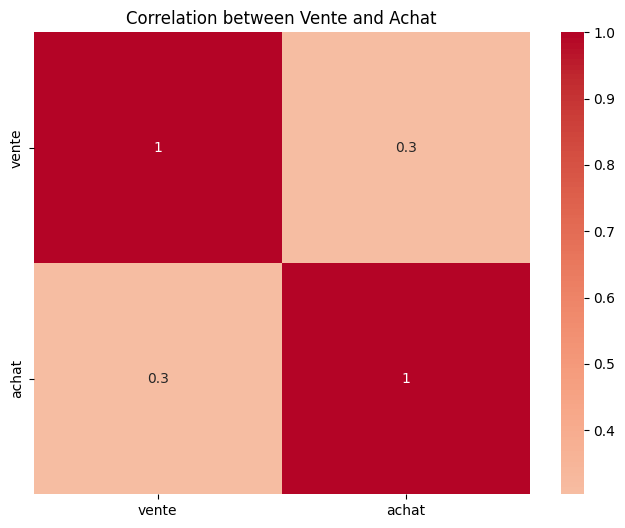

In [1323]:
# Visualiser la corrélation avec un heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Vente and Achat')
plt.show()

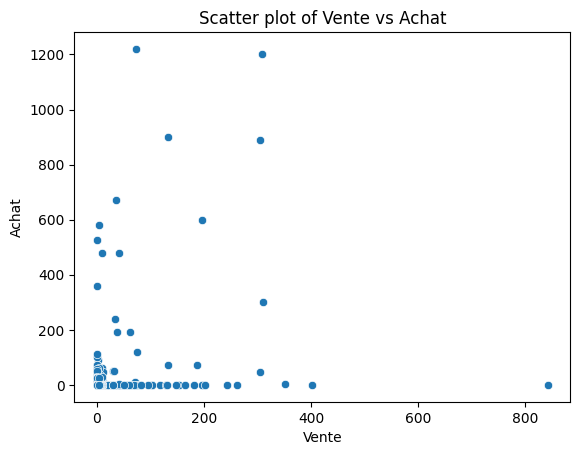

In [1324]:
sns.scatterplot(x='vente', y='achat', data=fusion_df)
plt.title('Scatter plot of Vente vs Achat')
plt.xlabel('Vente')
plt.ylabel('Achat')
plt.show()

In [1325]:
# Combiner les 'vente_perime' et 'achat_perime' en un seul DataFrame
# et la valeur du nouveau dataframe sera la différence 'vente - achat'

flow = vente_perime - achat_perime
flow.head(10)

prodid,216,1576,3700,4592,4968,5219,5469,5623,5870,6936
2019-08-09,-10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-08-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1326]:
flow.isnull().sum()

prodid
216     0
1576    0
3700    0
4592    0
4968    0
5219    0
5469    0
5623    0
5870    0
6936    0
dtype: int64

In [1327]:
flow[5219].describe()

count    2042.000000
mean       -0.024976
std         1.234354
min       -42.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: 5219, dtype: float64

In [1328]:
flow.rolling(window=30, min_periods=1).mean().head(20)

prodid,216,1576,3700,4592,4968,5219,5469,5623,5870,6936
2019-08-09,-10.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2019-08-10,-5.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2019-08-11,-3.333333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2019-08-12,-2.500000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2019-08-13,-2.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2019-08-14,-1.666667,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2019-08-15,-1.428571,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2019-08-16,-1.250000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2019-08-17,-1.111111,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2019-08-18,-1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [1329]:
flow.index.dtype

dtype('<M8[ns]')

In [1330]:
flow.columns

Index([216, 1576, 3700, 4592, 4968, 5219, 5469, 5623, 5870, 6936], dtype='int64', name='prodid')

In [1331]:
flow[1576].shape

(2042,)

<Axes: >

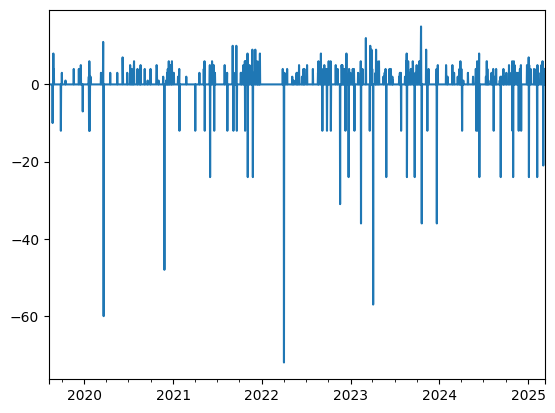

In [1332]:
flow[1576].plot()

In [1333]:
flow_week = flow.resample('W').mean()

In [1334]:
flow_week[4592].describe()

d:\MY_PYTHONS_VENVS\ste\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


count    293.000000
mean      -0.009751
std        0.999952
min       -8.571429
25%        0.000000
50%        0.000000
75%        0.142857
max        2.285714
Name: 4592, dtype: float64

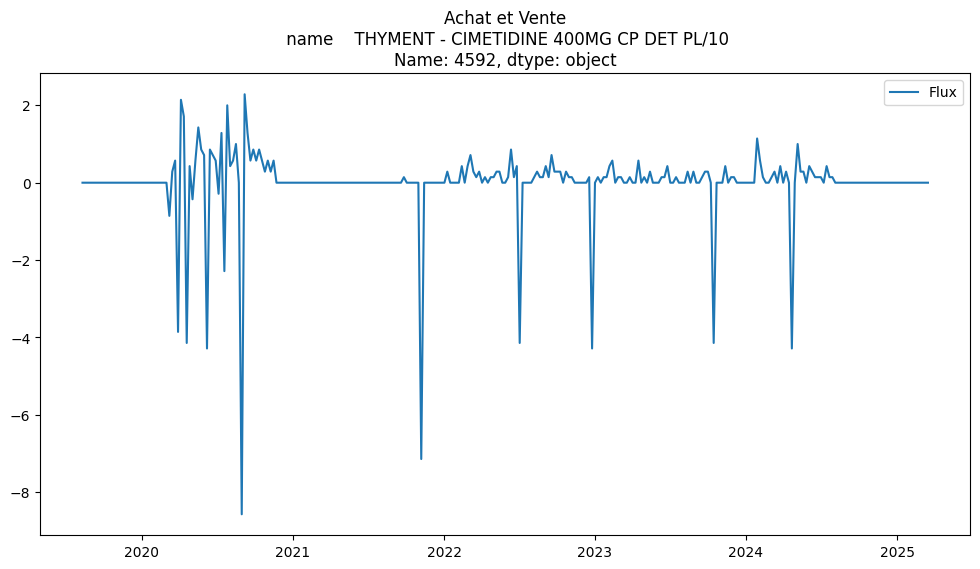

In [1335]:
# Afficher les deux courbes d'achat/vente de cotons sur le même graphique

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(flow_week[4592], label='Flux')
plt.title(f'Achat et Vente\n {prodid_map.loc[4592]}')
plt.legend()
plt.show()

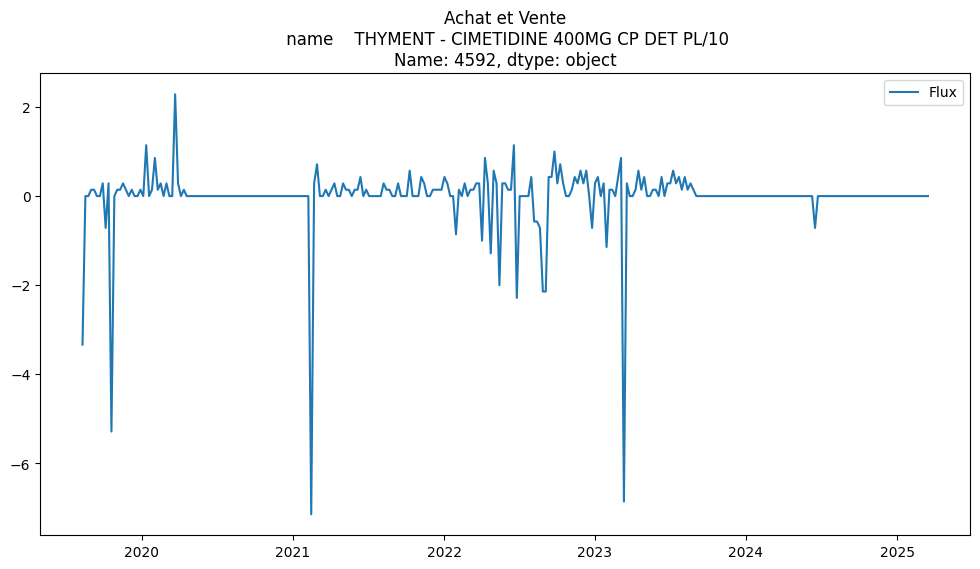

In [1336]:
plt.figure(figsize=(12, 6))

plt.plot(flow_month[216], label='Flux')
plt.title(f'Achat et Vente\n {prodid_map.loc[4592]}')
plt.legend()
plt.show()

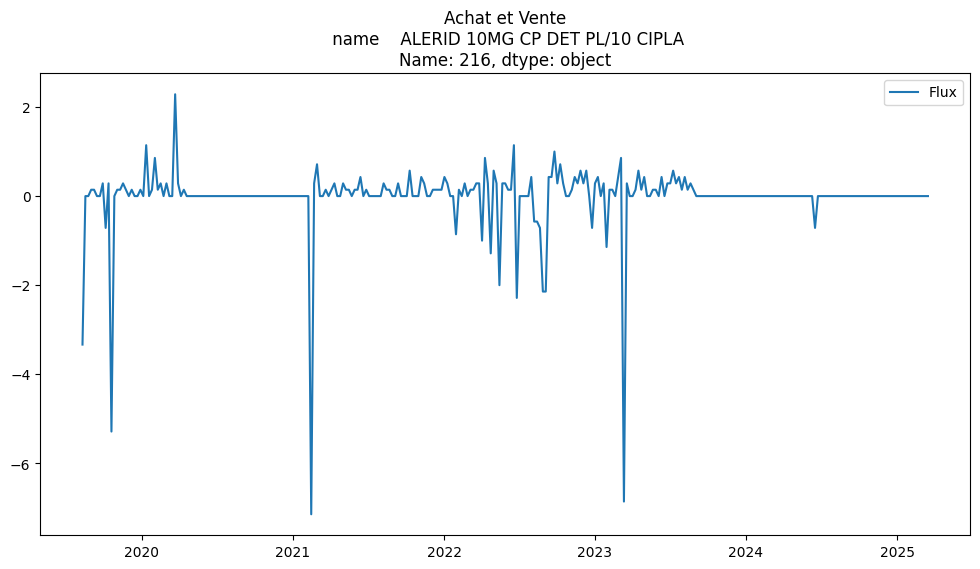

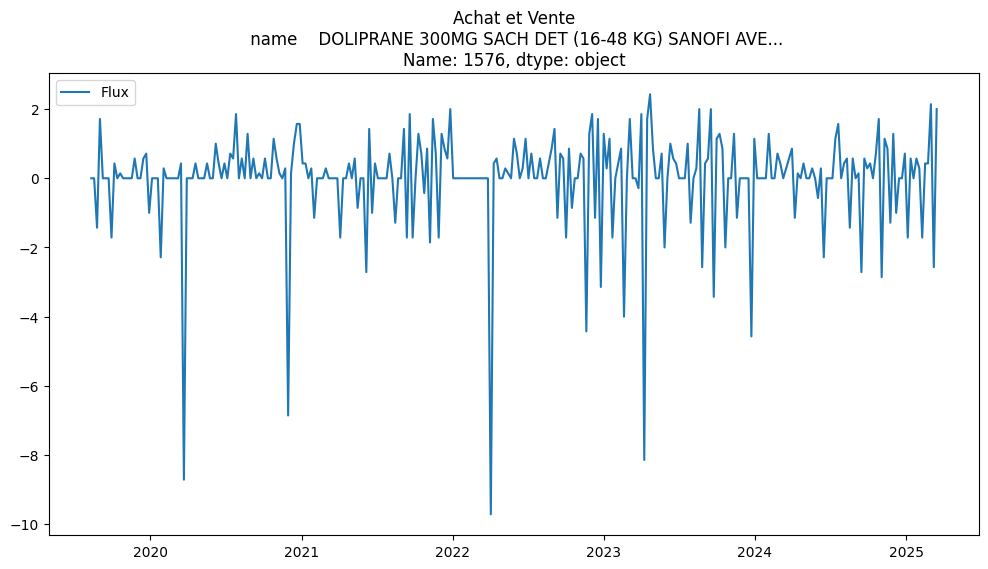

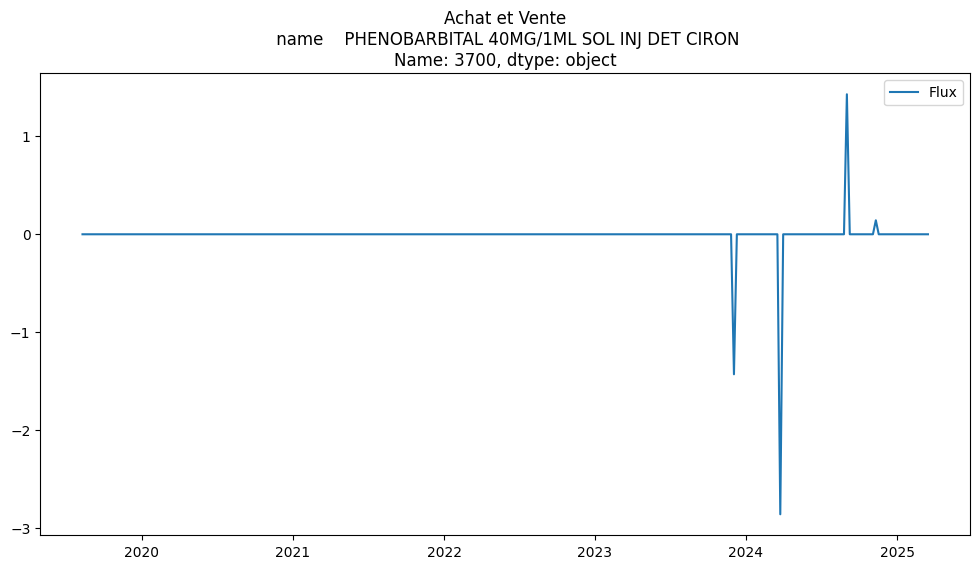

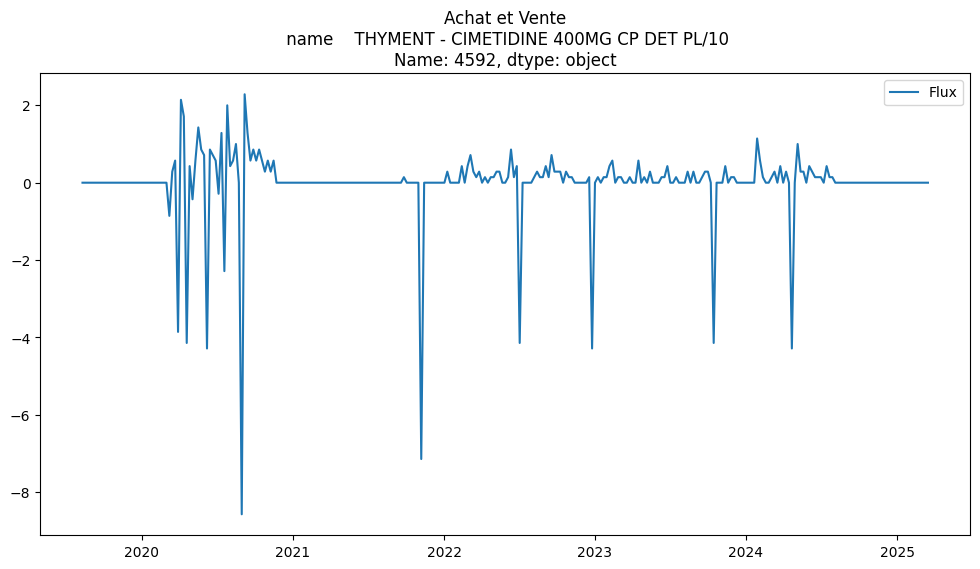

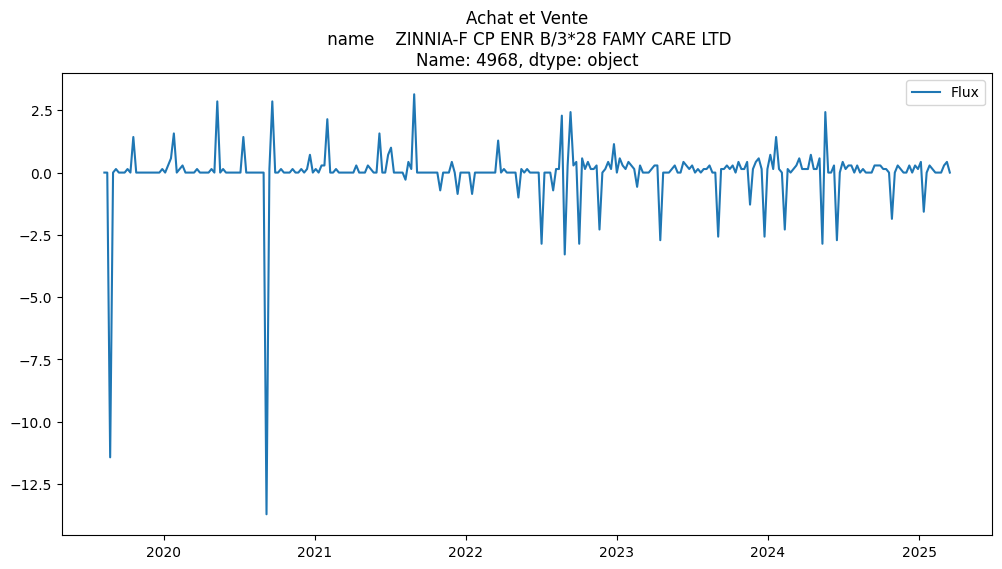

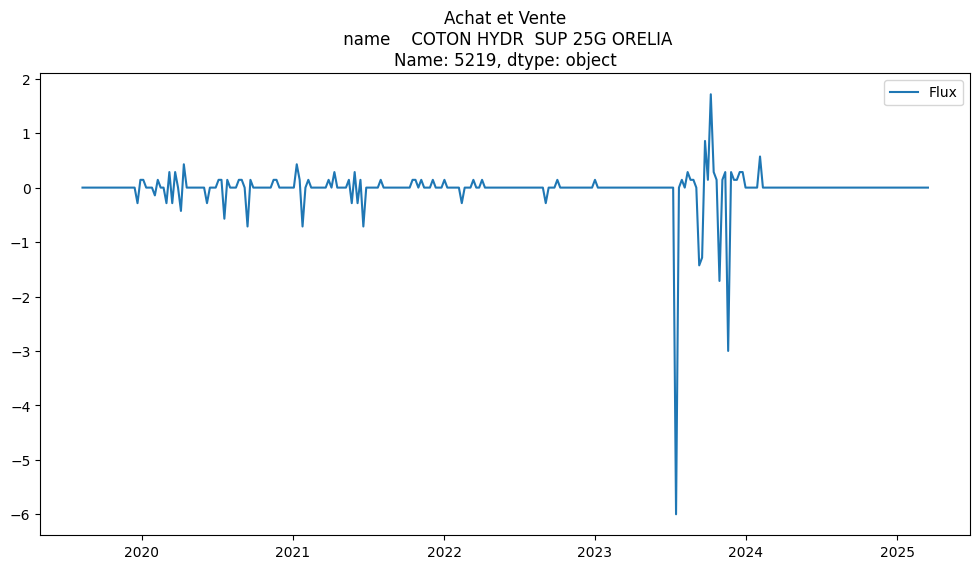

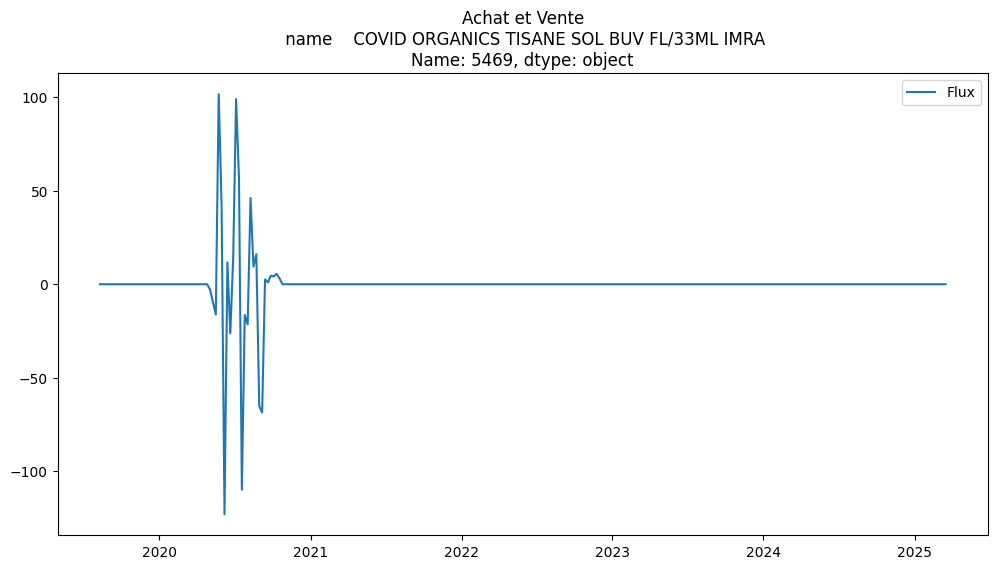

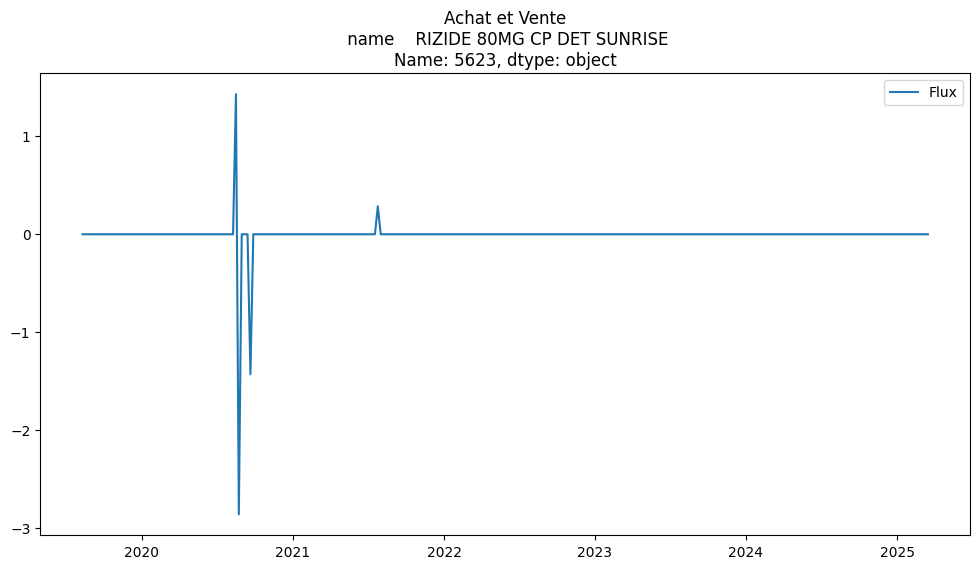

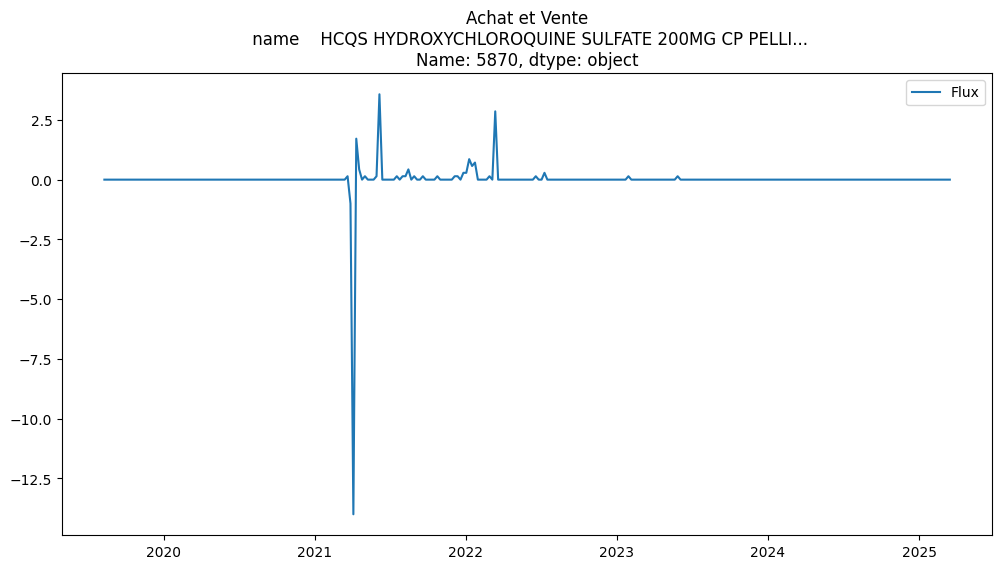

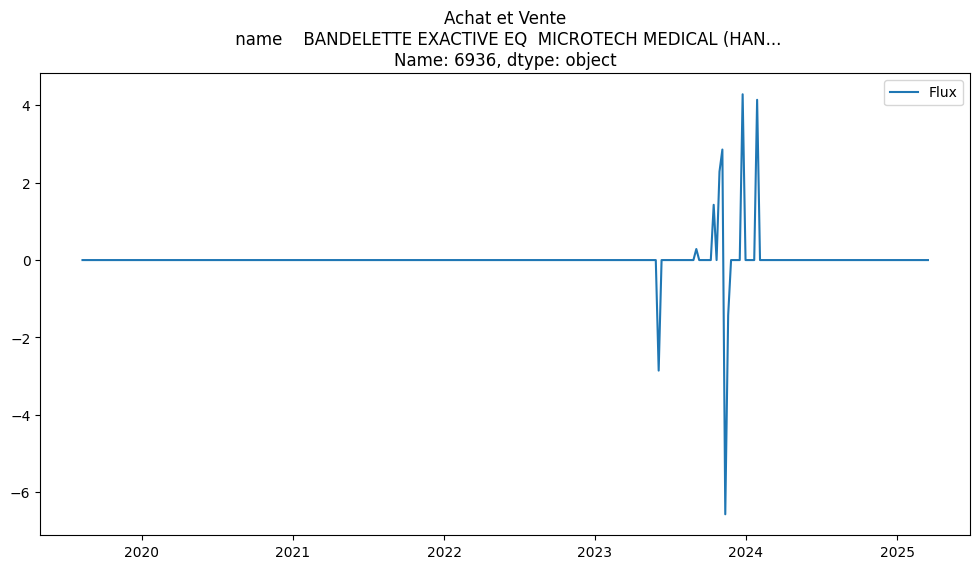

In [1337]:
for col in flow_week.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(flow_week[col], label='Flux')
    plt.title(f'Achat et Vente\n {prodid_map.loc[col]}')
    plt.legend()
    plt.show()

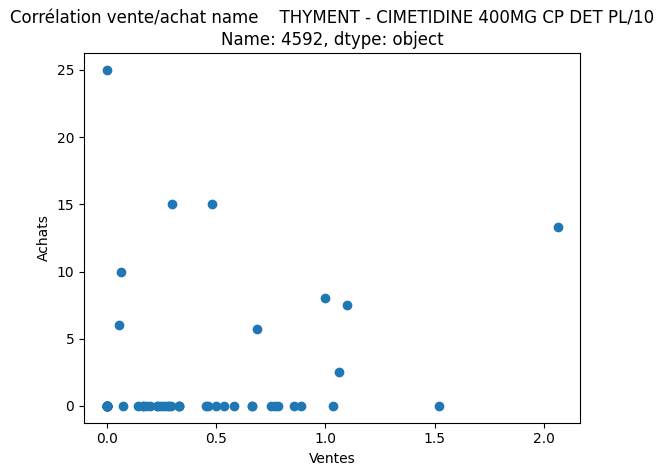

In [1338]:
# Etude de la corrélation entre les ventes et les achats
# Visualiser la corrélation entre les ventes et les achats avec un scatter plot

import matplotlib.pyplot as plt

plt.scatter(vp_norm[4592], ap_norm[4592])
plt.xlabel('Ventes')
plt.ylabel('Achats')
plt.title(f'Corrélation vente/achat {prodid_map.loc[4592]}')
plt.show()


In [1339]:
vp_norm[[5469, 5219]].head()

prodid,5469,5219
orderdate,,
2019-08-01,0.0,0.000000
2019-09-01,0.0,0.000000
2019-10-01,0.0,0.000000
2019-11-01,0.0,0.000000
2019-12-01,0.0,0.285714


In [1340]:
# Combiner les ventes et les achats dans un seul dataframe

data = pd.concat([vp_norm[[5469,5219,4968,4592,3700]], ap_norm[[5469,5219,4968, 4592,3700]]], axis=1, keys=['ventes', 'achats'])
data.head()

ventes                               achats                     
prodid       5469      5219      4968 4592 3700   5469 5219  4968 4592 3700
orderdate                                                                  
2019-08-01    0.0  0.000000  0.000000  0.0  0.0    0.0  0.0  40.0  0.0  0.0
2019-09-01    0.0  0.000000  0.333333  0.0  0.0    0.0  0.0   0.0  0.0  0.0
2019-10-01    0.0  0.000000  1.222222  0.0  0.0    0.0  0.0   0.0  0.0  0.0
2019-11-01    0.0  0.000000  0.000000  0.0  0.0    0.0  0.0   0.0  0.0  0.0
2019-12-01    0.0  0.285714  0.142857  0.0  0.0    0.0  1.0   0.0  0.0  0.0

C:\Users\herif\AppData\Local\Temp\ipykernel_14228\1207689782.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


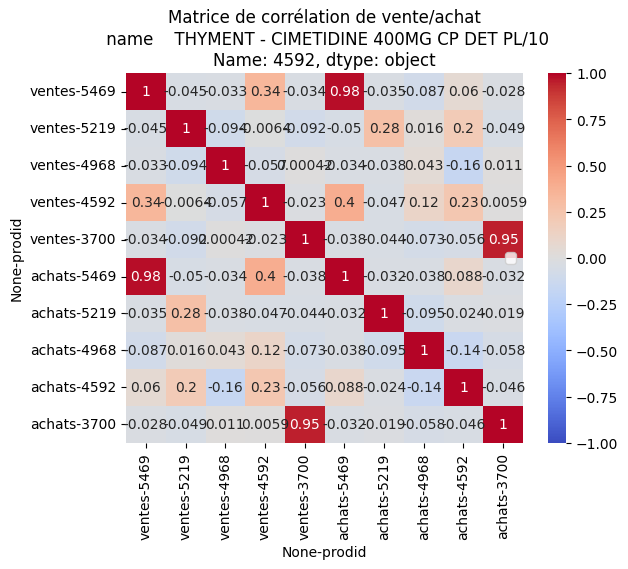

In [1341]:
# Visualiser de la matrice de corrélation
import seaborn as sns

plt.Figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.legend()
plt.title(f'Matrice de corrélation de vente/achat\n {prodid_map.loc[4592]}')
plt.show()

In [1342]:
prodid_map.loc[5469]

name    COVID ORGANICS TISANE SOL BUV FL/33ML IMRA
Name: 5469, dtype: object

In [1343]:
# Créer un dataframe avec les ventes et les achats de coton et la différence entre les deux

flow = pd.DataFrame()